** Support Vector Machine **

In [10]:
%matplotlib inline
%run 'TrainingData.ipynb'
%run 'DisplayHelpers.ipynb'

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as smp
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.cross_validation import KFold
from scipy.sparse import lil_matrix

myappdata = TrainingData()

N Fold Precision = 0.667499176428 Recall 0.668359790118 Fscore 0.663261500895
N Fold Precision = 0.640096559652 Recall 0.645118272055 Fscore 0.638994597958
N Fold Precision = 0.641747788333 Recall 0.639685357136 Fscore 0.635560783405
N Fold Precision = 0.648821789078 Recall 0.647506818405 Fscore 0.643059693885
N Fold Precision = 0.635936283659 Recall 0.631238785545 Fscore 0.627120264979
N Fold Precision = 0.646437004696 Recall 0.652916638431 Fscore 0.645290280303
N Fold Precision = 0.662443353815 Recall 0.662257232374 Fscore 0.657735880713
N Fold Precision = 0.659863403995 Recall 0.653656668512 Fscore 0.652099390681
N Fold Precision = 0.666604189616 Recall 0.668980196001 Fscore 0.662844597867
N Fold Precision = 0.652657026211 Recall 0.656179032141 Fscore 0.64948561498
Overall Precision = 0.652210657548 Recall 0.652589879072 fscore 0.647545260567


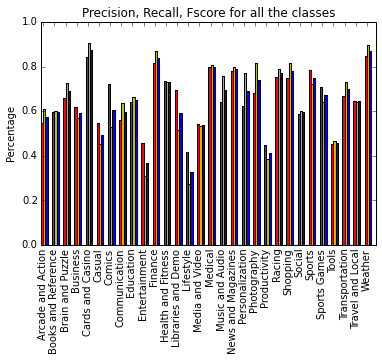

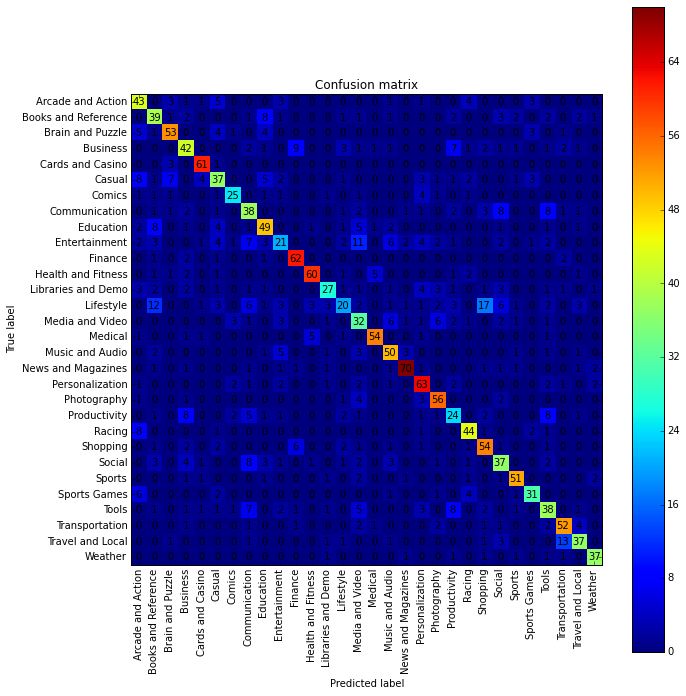

In [11]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn import svm
from sklearn import linear_model

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = svm.LinearSVC()
    clf.fit(train_data, train_labels)
    predict_labels_arr = clf.predict(test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall, fscore))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1} Fscore {2}".format(sum(precision)/precision.size, 
                                                                sum(recall)/recall.size,
                                                                sum(fscore)/fscore.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
average_fscore = [sum(elem)/len(elem) for elem in zip(*[x[2] for x in results])]

print("Overall Precision = {0} Recall {1} fscore {2}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall),
                                                    sum(average_fscore)/len(average_fscore)))

plot_precision_and_recall(average_precision, average_recall, average_fscore, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)